## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 3 is due on 2/28/25

## Perceptron

You will code the "perceptron learning algorithm" for arbitrary number of features p. 

In [1]:
import numpy as np

def perceptron_learning_algorithm(Xinput, y_binary, MAX_ITER=1000, learning_rate=1, w=None):
    # Convert input to a NumPy array and add bias column
    Xinput = np.asarray(Xinput)
    n = Xinput.shape[0]
    # Add a column of ones to the left for the bias term
    X = np.column_stack((np.ones(n), Xinput))
    p = X.shape[1]
    
    # Initialize the weight vector 
    if w is None:
        w = np.zeros(p)
    else:
        w = np.asarray(w)
        if w.shape[0] != p:
            raise ValueError(f"Initial weight vector 'w' must be of length {p} (including bias term).")
    
    # Iterate up to MAX_ITER times
    for iter in range(1, MAX_ITER + 1):
        error_flag = False  # Flag to check if any misclassification occurred in this iteration
        
        # Loop over each training example
        for i in range(n):
            x_i = X[i, :]
            # Compute the activation
            activation = np.sum(x_i * w)
            # Determine the predicted class (using threshold 0)
            yhat_i = 1 if activation > 0 else 0
            
            # If the prediction is wrong, update the weight vector
            if yhat_i != y_binary[i]:
                w = w + learning_rate * (y_binary[i] - yhat_i) * x_i
                error_flag = True
        
        # Stop early if no misclassifications were found in this iteration
        if not error_flag:
            print(f"Convergence achieved at iteration {iter}")
            break
            
    return w

# Specs
# Xinput should be a 2D array-like structure (or a 1D array if you have only one feature per observation)
# y_binary should be a binary vector (list or numpy array) of the same length as the number of rows in Xinput.
# For example:
# Xinput = np.array([[2.5], [3.0], [3.5]])
# y_binary = np.array([0, 1, 1])
# weights = perceptron_learning_algorithm(Xinput, y_binary)
# print("Learned weights:", weights)


To understand what the algorithm is doing - linear "discrimination" between two response categories, we can draw a picture. First let's make up some very simple training data D.

In [2]:
import pandas as pd

Xy_simple = pd.DataFrame({
    'response': [0, 0, 0, 1, 1, 1],
    'first_feature': [1, 1, 2, 3, 3, 4],
    'second_feature': [1, 2, 1, 3, 4, 3]
})

print(Xy_simple)


   response  first_feature  second_feature
0         0              1               1
1         0              1               2
2         0              2               1
3         1              3               3
4         1              3               4
5         1              4               3


We haven't spoken about visualization yet, but it is important we do some of it now. Thus, I will write this code for you and you will just run it. First we load the visualization library we're going to use:

<ggplot: (640 x 480)>


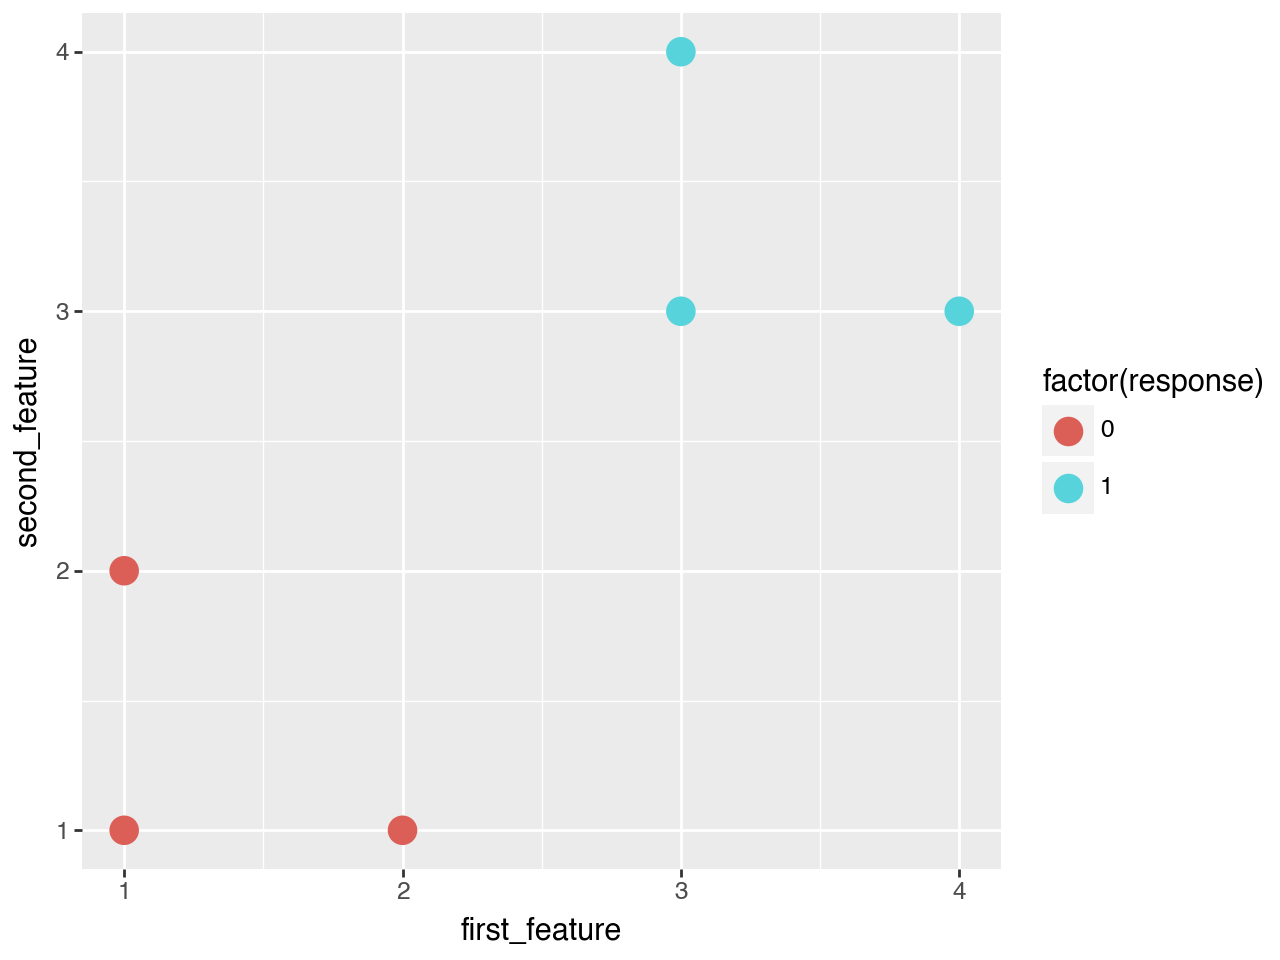

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_point

# Create the dataset equivalent to R's Xy_simple
Xy_simple = pd.DataFrame({
    'response': [0, 0, 0, 1, 1, 1],
    'first_feature': [1, 1, 2, 3, 3, 4],
    'second_feature': [1, 2, 1, 3, 4, 3]
})

# Create the visualization
simple_viz_obj = (ggplot(Xy_simple, aes(x='first_feature', y='second_feature', color='factor(response)'))
                  + geom_point(size=5))

# Display the plot (in a Jupyter Notebook, this will render inline)
print(simple_viz_obj)
simple_viz_obj

In [4]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


Explain this picture ...

Red represents 0 and blue represent 1 and on the picture it is linearly separable data.

Now, let us run the algorithm and see what happens:

In [5]:
# Create the input matrix by combining the two feature columns
Xinput = np.column_stack((Xy_simple['first_feature'], Xy_simple['second_feature']))

# Create the binary response vector, where response==1 becomes 1 and otherwise 0
y_binary = (Xy_simple['response'] == 1).astype(int).values

# Run the perceptron learning algorithm (assuming it is already defined)
w_vec_simple_per = perceptron_learning_algorithm(Xinput, y_binary)

print(w_vec_simple_per)

Convergence achieved at iteration 8
[-7.  4. -1.]


Explain this output. What do the numbers mean? What is the intercept of this line and the slope? You will have to do some algebra.

The output are the weight vector. w consists of (w0, w1, w2) so (-7, 4, -1). when I substitute to the equation, it becomes -7 + 4x1+ -1x2 = 0
After calculation, I get x2 = (7/4) - x1. so the intercept is 7/4 and the slope is -1.

<ggplot: (640 x 480)>


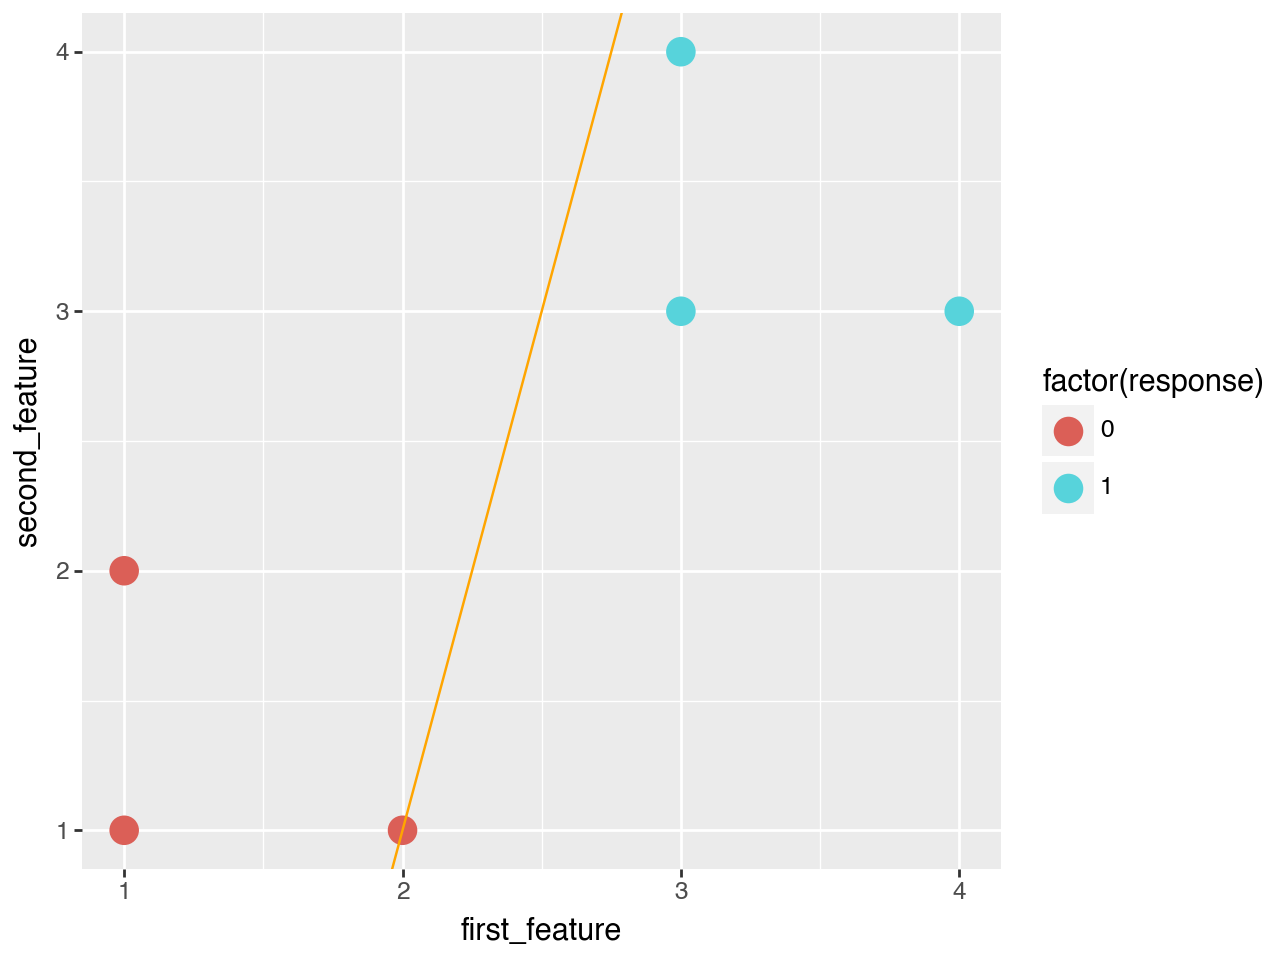

In [6]:
from plotnine import geom_abline

# Assuming w_vec_simple_per is a NumPy array or list with three elements:
# Python indexing: w_vec_simple_per[0] is the bias, w_vec_simple_per[1] is for first_feature,
# and w_vec_simple_per[2] is for second_feature.
# The R code computes:
#   intercept = -w_vec_simple_per[1] / w_vec_simple_per[3]
#   slope     = -w_vec_simple_per[2] / w_vec_simple_per[3]
# In Python, that becomes:
#   intercept = -w_vec_simple_per[0] / w_vec_simple_per[2]
#   slope     = -w_vec_simple_per[1] / w_vec_simple_per[2]

simple_perceptron_line = geom_abline(
    intercept = -w_vec_simple_per[0] / w_vec_simple_per[2],
    slope = -w_vec_simple_per[1] / w_vec_simple_per[2],
    color = "orange"
)

# Assuming simple_viz_obj is your base Plotnine plot object:
plot = simple_viz_obj + simple_perceptron_line
print(plot)
plot

Explain this picture. Why is this line of separation not "satisfying" to you?

The line of the separation is not satisfying to me because it is not in the middle of two supporting vectors.

Extra Credit (+5): Program the maximum-margin hyperplane perceptron that provides the best linear discrimination model for linearly separable data. Make sure you provide clear comments explain your code.

## Support Vector Machine vs. Perceptron

We recreate the data from the previous example and visualize it:

<ggplot: (640 x 480)>


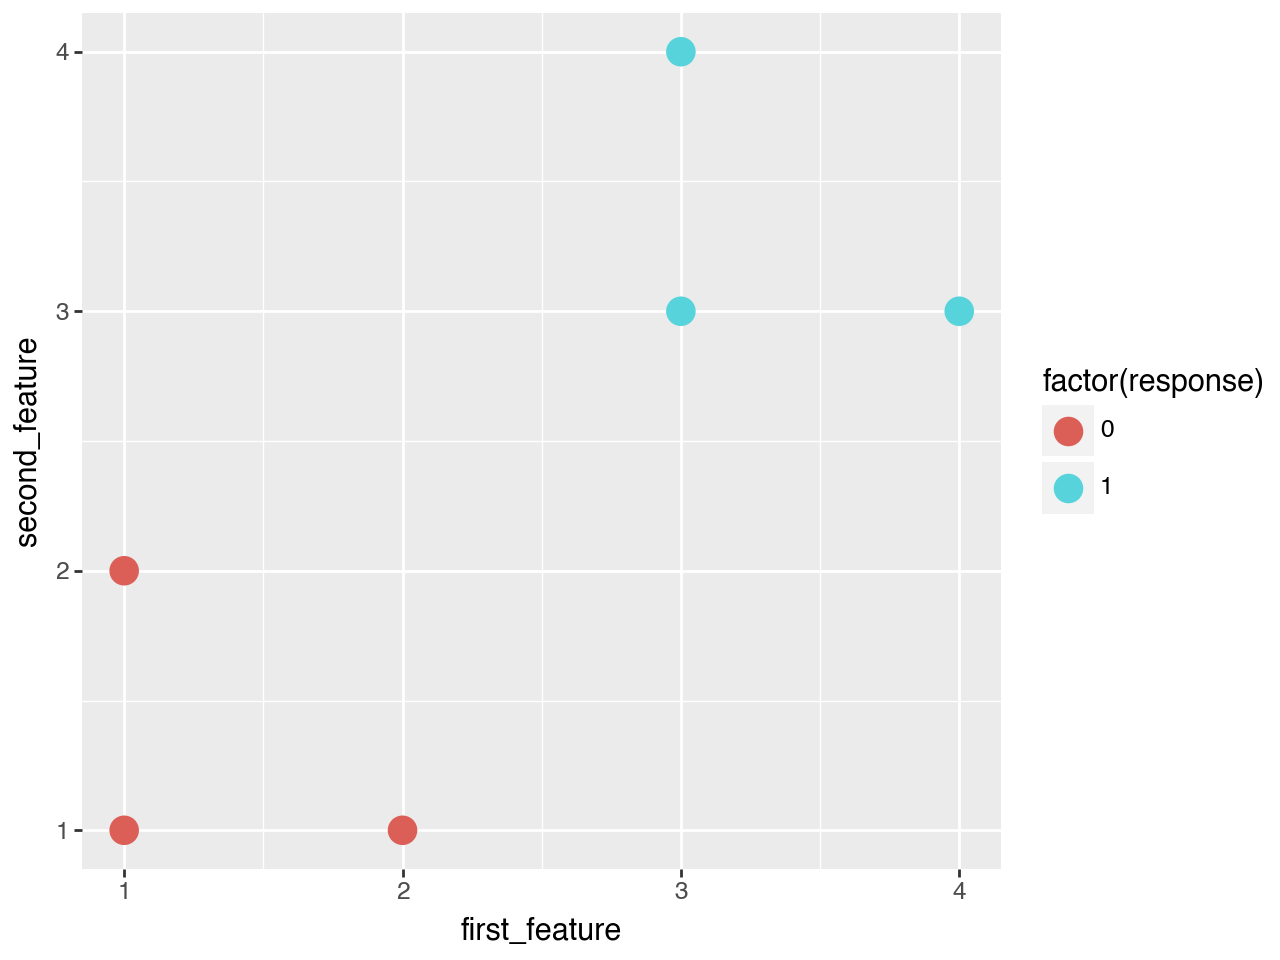

In [7]:
# Create the dataset equivalent to R's Xy_simple
Xy_simple = pd.DataFrame({
    'response': [0, 0, 0, 1, 1, 1],
    'first_feature': [1, 1, 2, 3, 3, 4],
    'second_feature': [1, 2, 1, 3, 4, 3]
})

# Create the visualization
simple_viz_obj = (ggplot(Xy_simple, aes(x='first_feature', y='second_feature', color='factor(response)'))
                  + geom_point(size=5))

# Display the plot (in a Jupyter Notebook, this will render inline)
print(simple_viz_obj)
simple_viz_obj

Use the import SVC from the sklearn package to fit an SVM model to the simple data. the SVC function to create the model, pass in the data frame, set kernel to be `linear` for the linear SVM and don't scale the covariates. Call the model object `svm_model`. 

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.svm import SVC

# Define predictors (all columns except 'response') and response
X = Xy_simple[['first_feature', 'second_feature']]
y = Xy_simple['response']

# Fit a linear SVM model (with kernel 'linear' and without scaling the covariates)
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# The fitted model is stored in svm_model
print("SVM model coefficients and intercept:")
# For a linear SVM, the coefficients are stored in svm_model.coef_ and the intercept in svm_model.intercept_
print("Coefficients:", svm_model.coef_)
print("Intercept:", svm_model.intercept_)


SVM model coefficients and intercept:
Coefficients: [[0.6664 0.6668]]
Intercept: [-2.99973333]


and then use the following code to visualize the line in purple:

<ggplot: (640 x 480)>


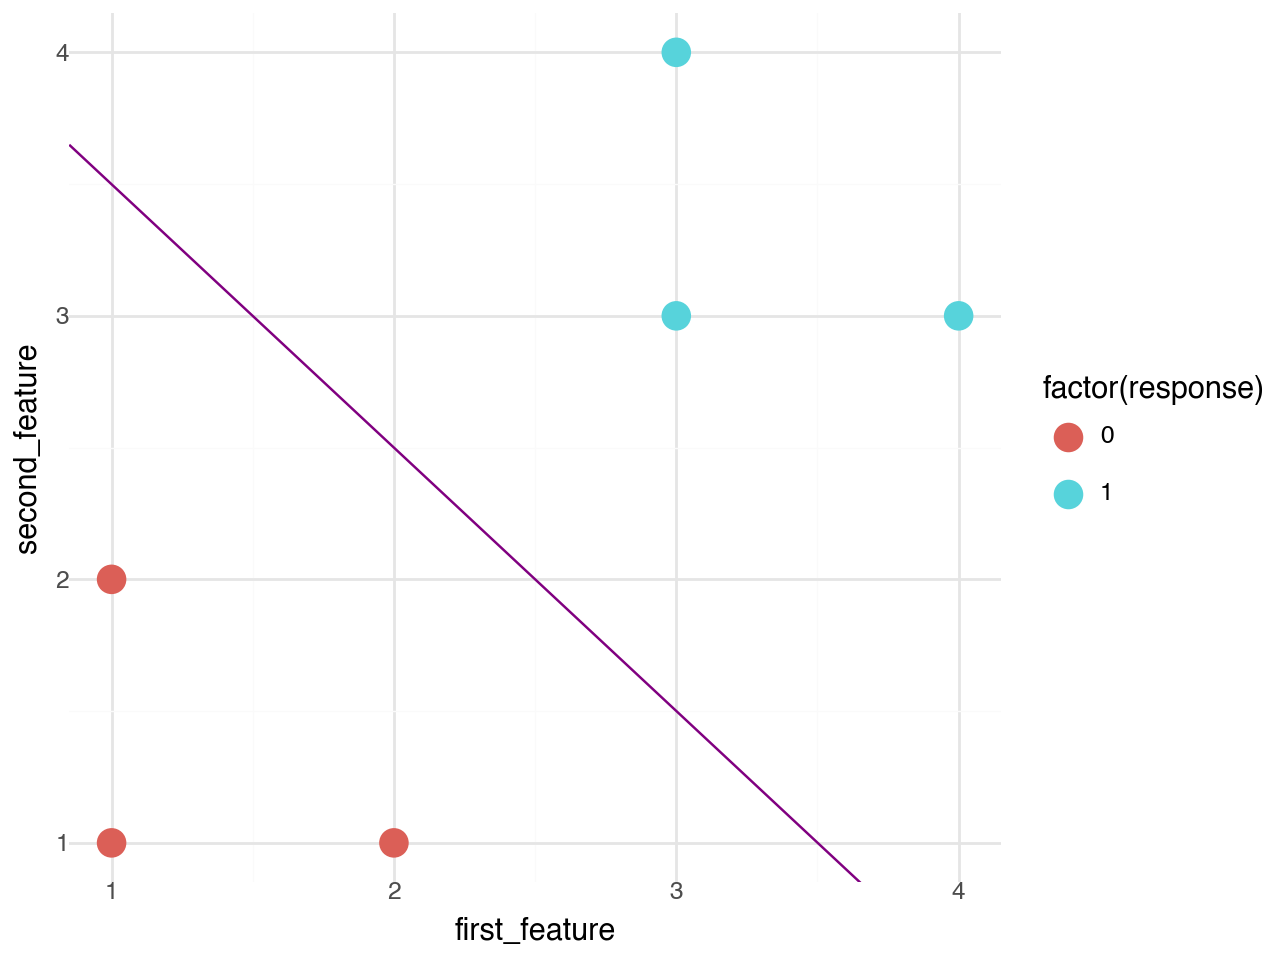

In [10]:
from plotnine import ggplot, aes, geom_point, geom_abline, theme_minimal


# Prepare the predictors and response
X = Xy_simple[['first_feature', 'second_feature']]
y = Xy_simple['response']

# Fit the linear SVM model (kernel='linear', no scaling done)
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# In scikit-learn, the decision function is: f(x) = w1*x1 + w2*x2 + b,
# where svm_model.coef_ = [w1, w2] and svm_model.intercept_ = [b].
# To mimic the R code:
# w_vec_simple_svm = c(svm_model$rho, -t(svm_model$coefs) %*% support_vectors)
# Note: In e1071, svm_model$rho is negative of the intercept.
# For our purposes, we construct a weight vector as: [b, w1, w2]
w_vec_simple_svm = np.concatenate((svm_model.intercept_, svm_model.coef_.flatten()))

# For plotting the decision boundary, we solve:
# w1 * x + w2 * y + b = 0  ->  y = -b/w2 - (w1/w2)*x.
# So, the intercept for the line is -b/w2 and the slope is -w1/w2.
line_intercept = -w_vec_simple_svm[0] / w_vec_simple_svm[2]
line_slope = -w_vec_simple_svm[1] / w_vec_simple_svm[2]

# Create the decision boundary line in Plotnine:
simple_svm_line = geom_abline(intercept=line_intercept, slope=line_slope, color="purple")

# Create the base plot for the data (using factor conversion for color)
simple_viz_obj = (ggplot(Xy_simple, aes(x="first_feature", y="second_feature", color="factor(response)"))
                  + geom_point(size=5)
                  + simple_svm_line
                  + theme_minimal())

print(simple_viz_obj)
simple_viz_obj

Source the `perceptron_learning_algorithm` then run the following to fit the perceptron and plot its line in orange with the SVM's line.

<ggplot: (640 x 480)>


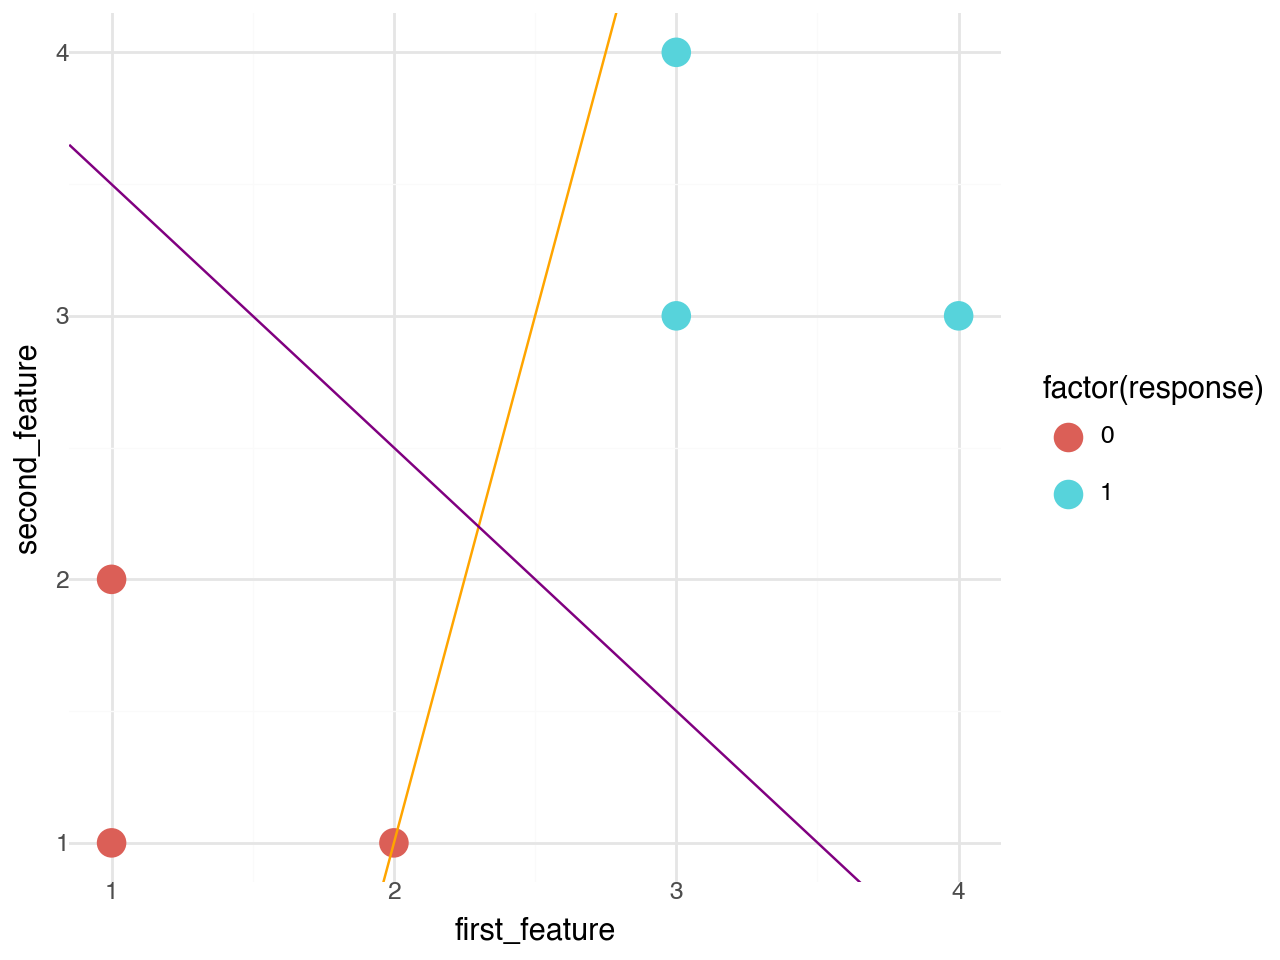

In [11]:
# Compute the decision boundary for the perceptron.
# In R, w_vec_simple_per[1] is bias, [2] for first_feature, [3] for second_feature.
# Python is 0-indexed, so:
#   intercept = -w_vec_simple_per[0] / w_vec_simple_per[2]
#   slope     = -w_vec_simple_per[1] / w_vec_simple_per[2]
perceptron_intercept = -w_vec_simple_per[0] / w_vec_simple_per[2]
perceptron_slope = -w_vec_simple_per[1] / w_vec_simple_per[2]


# Assume that simple_svm_line and simple_viz_obj were defined in previous code.
# For example, simple_viz_obj might be:
simple_viz_obj = (ggplot(Xy_simple, aes(x="first_feature", y="second_feature", color="factor(response)"))
                  + geom_point(size=5)
                  + theme_minimal())

# Simple_svm_line (the SVM decision boundary) ... this was also defined in the previous cell.
simple_svm_line = geom_abline(intercept=line_intercept, slope=line_slope, color="purple")

# Combine the plots: data, SVM line (purple) and perceptron line (orange)
final_plot = simple_viz_obj + simple_perceptron_line + simple_svm_line

print(final_plot)
final_plot

Is this SVM line a better fit than the perceptron?

In [ ]:
Yes. This SVM line is a better fit than the perceptron as it is in more middle than the perceptron line.


Extra Credit (+5): Now write your own implementation of the linear support vector machine algorithm using the Vapnik objective function discussed in 342.

In [12]:
#This function should implement the hinge-loss + maximum margin linear support vector machine algorithm of Vladimir Vapnik (1963).
#parameters to include: Xinput, y_binary, MAX_ITER, lambda(give this another name since lambda is a keyword in python). 
def linear_svm_learning_algorithm():

SyntaxError: incomplete input (3847313723.py, line 3)

## Multinomial Classification using KNN

Write a k = 1 nearest neighbor algorithm using the Euclidean distance function. The following comments are standard "Roxygen" format for documentation. Hopefully, we will get to packages at some point and we will go over this again. It is your job also to fill in this documentation.

In [13]:
import numpy as np

def nn_algorithm_predict(Xinput, y_binary, Xtest):
    """
    1-Nearest Neighbor Predictor using Euclidean Distance.
    
    This function implements a simple 1-nearest neighbor algorithm. Given a matrix of training 
    features (Xinput), a vector of binary class labels (y_binary), and a test observation (Xtest),
it computes the Euclidean distance between Xtest and each training observation, and returns the 
    class label corresponding to the nearest neighbor.
    
    Parameters:
    -----------
    Xinput : array-like
        A 2D array (or something convertible to a NumPy array) where each row represents an observation.
    y_binary : array-like
        A vector of binary class labels corresponding to each row in Xinput.
    Xtest : array-like
        A 1D array representing the features of the test observation.
    
    Returns:
    --------
    int or float:
        The predicted class label for the test observation.
    """
    Xinput = np.array(Xinput)
    n = Xinput.shape[0]
    distances = np.empty(n)

    for i in range(n):
        distances[i] = np.sum((Xinput[i, :] - Xtest)**2)

    return y_binary[np.argmin(distances)]
    
# Example usage:
# Xinput = np.array([[1, 2], [2, 3], [3, 4]])
# y_binary = np.array([0, 1, 0])
# Xtest = np.array([2.5, 3.5])
# print(nn_algorithm_predict(Xinput, y_binary, Xtest))


In [14]:
# Example usage:
Xinput = np.array([[1, 2], [2, 3], [3, 4]])
y_binary = np.array([0, 1, 0])
Xtest = np.array([3.5, 5])
print(nn_algorithm_predict(Xinput, y_binary, Xtest))

0


Write a few tests to ensure it actually works importing  'assert_equals' from numpy.testing

In [15]:
from numpy.testing import assert_equal

Xinput_test = np.array([[3, 4], [1, 3], [6, 9]])
y_binary_test = np.array([1,0,1])
Xtest = np.array([2.5,7])
pred = nn_algorithm_predict(Xinput_test, y_binary_test, Xtest)
assert_equal(pred, 1)
print("Test 1 passed: Exact match returns the correct label.")

Test 1 passed: Exact match returns the correct label.


In [17]:
# Second Test
# TODO

Xinput_test = np.array([[5, 2], [8, 7], [4, 6]])
y_binary_test = np.array([0, 1, 0])
Xtest = np.array([6, 5])
pred = nn_algorithm_predict(Xinput_test, y_binary_test, Xtest)
assert_equal(pred, 0)
print("Test 2 passed: Exact match returns the correct label.")


Test 2 passed: Exact match returns the correct label.


We now add an argument `d` representing any legal distance function to the `nn_algorithm_predict` function. Update the implementation so it performs NN using that distance function. Set the default function to be the Euclidean distance in the original function. Also, alter the documentation in the appropriate places.

In [18]:
import numpy as np

def nn_algorithm_predict(Xinput, y_binary, Xtest, d=lambda x, y: np.sqrt(np.sum((x - y)**2))):
    """
    1-Nearest Neighbor Predictor with Custom Distance Function.

    This function implements a simple 1-nearest neighbor algorithm using a customizable distance 
    function. Given a matrix of training features (Xinput), a vector of class labels (y_binary), 
    and a test observation (Xtest), it computes the distance from Xtest to each training observation 
    using the provided distance function (defaulting to Euclidean distance), and returns the label 
    corresponding to the nearest neighbor.

    Parameters:
    -----------
    Xinput : array-like
        A 2D array where each row represents an observation.
    y_binary : array-like
        A vector of class labels corresponding to each row in Xinput.
    Xtest : array-like
        A 1D array representing the features of the test observation.
    d : function, optional
        A function that takes two numeric arrays as input and returns a numeric distance between them.
        The default is a function that computes the Euclidean distance.

    Returns:
    --------
    The predicted class label for the test observation.
    """
    Xinput = np.array(Xinput)
    n = Xinput.shape[0]
    distances = np.empty(n)

    for i in range(n):
        distances[i] = d(Xinput[i, :], Xtest)

    return y_binary[np.argmin(distances)]



In [19]:
# Test 1: Exact Match Test
# If the test observation exactly matches a training observation, the corresponding label should be returned.
Xinput_test1 = np.array([[1, 1],
                         [2, 2],
                         [3, 3]])
y_binary_test1 = np.array([0, 1, 0])
Xtest1 = np.array([1, 1])
pred1 = nn_algorithm_predict(Xinput_test1, y_binary_test1, Xtest1)
assert_equal(pred1, 0)
print("Test 1 passed: Exact match returns the correct label.")

Test 1 passed: Exact match returns the correct label.


In [20]:
# Define the Chebyshev distance function
chebyshev_distance = lambda x, y: np.max(np.abs(x - y))

# Create training data where the nearest neighbor is uniquely determined using Chebyshev distance:
Xinput_test_alt = np.array([[1, 2], [3, 4], [5, 6]])
y_binary_test_alt = np.array([0, 1, 0])
# Choose a test observation that is clearly closest to the second training observation:
Xtest_alt = np.array([3.1, 4.1])
# Compute distances:
# For [1,2]: max(|3.1-1|, |4.1-2|) = max(2.1, 2.1) = 2.1
# For [3,4]: max(|3.1-3|, |4.1-4|) = max(0.1, 0.1) = 0.1
# For [5,6]: max(|3.1-5|, |4.1-6|) = max(1.9, 1.9) = 1.9
# The nearest neighbor is the second observation (with label 1).
pred_alt = nn_algorithm_predict(Xinput_test_alt, y_binary_test_alt, Xtest_alt, d=chebyshev_distance)
assert_equal(pred_alt, 1)
print("Alternate Test 2 passed: Chebyshev distance with unique nearest neighbor returns the correct label.")

Alternate Test 2 passed: Chebyshev distance with unique nearest neighbor returns the correct label.


## Regression via OLS with one feature

Let's quickly recreate the sample data set from practice lecture 7:

In [21]:
import numpy as np

np.random.seed(1984)
n = 20
x = np.random.uniform(size=n)
beta_0 = 3
beta_1 = -2

Compute $h^*$ as `h_star_x`, then draw $\epsilon$ from an iid $N(0, 0.33^2)$ distribution as `epsilon`, then compute the vector $y$.


In [22]:
h_star_x = beta_0 + beta_1 * x
epsilon = np.random.normal(loc=0, scale = 0.33, size = n)
y = h_star_x + epsilon

Graph the data by running the following chunk:

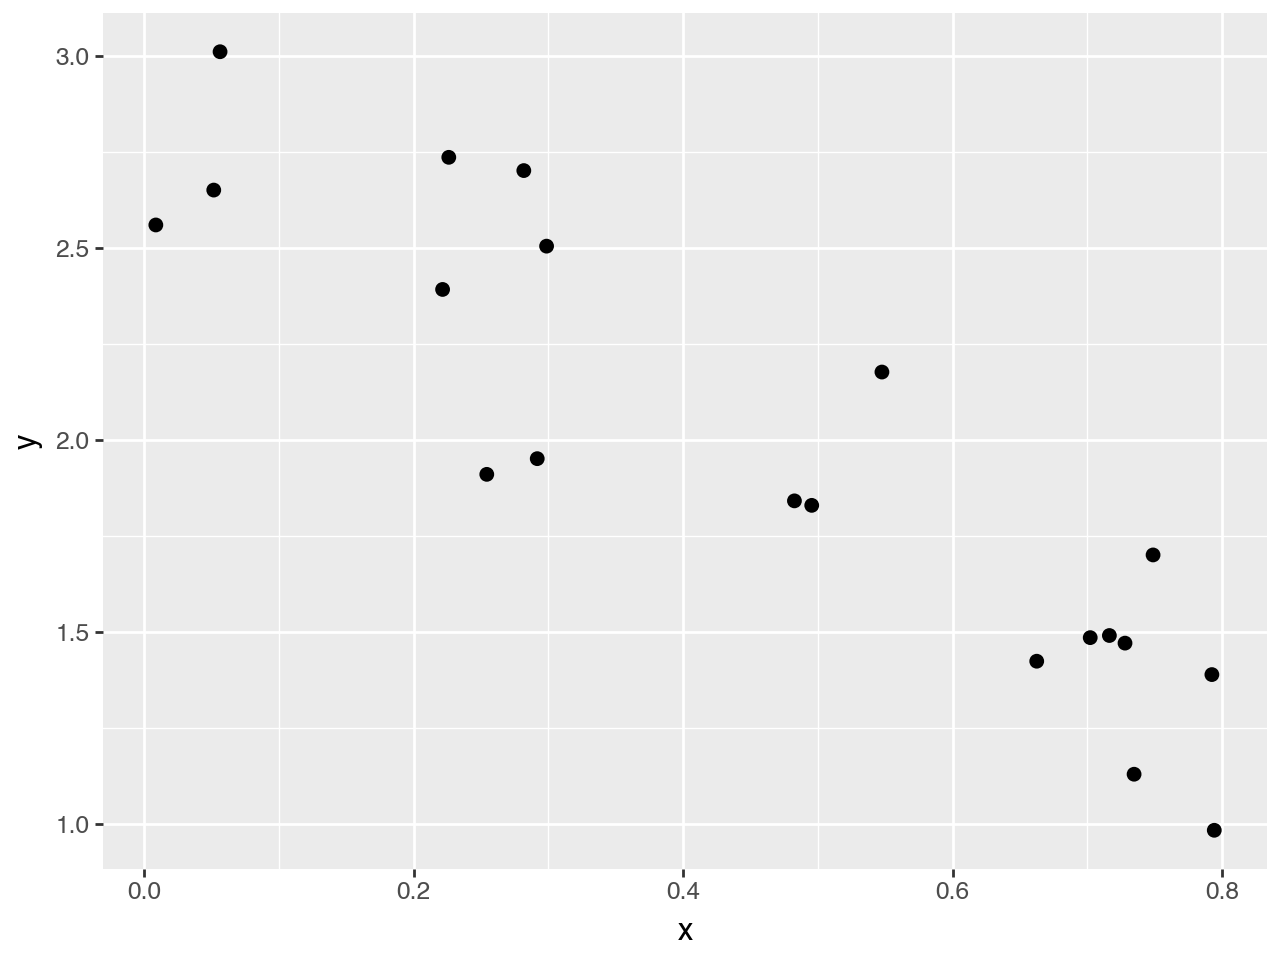

In [23]:
import pandas as pd
from plotnine import ggplot, aes, geom_point

# Assuming x and y are defined (e.g., as NumPy arrays or lists)
simple_df = pd.DataFrame({'x': x, 'y': y})
simple_viz_obj = (ggplot(simple_df, aes(x='x', y='y'))
                  + geom_point(size=2))
simple_viz_obj

Does this make sense given the values of beta_0 and beta_1?

Yes. this make sense. as the model is h*(x) = 3 - 2x with the epsilon with the standard deviation of 0.33. the dots are going down as the slop is negative.


Write a function `my_simple_ols` that takes in a vector `x` and vector `y` and returns a list that contains the `b_0` (intercept), `b_1` (slope), `yhat` (the predictions), `e` (the residuals), `SSE`, `SST`, `MSE`, `RMSE` and `Rsq` (for the R-squared metric). Internally, you can only use the functions `sum` and `length` and other basic arithmetic operations. You should throw errors if the inputs are non-numeric or not the same length. You should also name the class of the return value `my_simple_ols_obj` by using the `class` function as a setter. No need to create ROxygen documentation here.

In [24]:
import numpy as np
import math

def my_simple_ols_mod(x, y):
    # Convert to NumPy arrays
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Check that x and y are 1-D numeric arrays of the same length
    if x.ndim != 1 or y.ndim != 1:
        raise ValueError("x and y must be one-dimensional arrays.")
    n = len(y)
    if len(x) != n:
        raise ValueError("x and y need to be same length.")
    if n <= 2:
        raise ValueError("n must be more than 2")
    if not np.issubdtype(x.dtype, np.number):
        raise ValueError("x needs to be numeric")
    if not np.issubdtype(y.dtype, np.number):
        raise ValueError("y needs to be numeric")
    
    # Compute means
    xbar = np.sum(x) / n
    ybar = np.sum(y) / n
    
    # Compute slope (b_1) and intercept (b_0)
    numerator = np.sum(x * y) - n * xbar * ybar
    denominator = np.sum(x**2) - n * xbar**2
    b_1 = numerator / denominator
    b_0 = ybar - b_1 * xbar
    
    # Compute predictions and residuals
    yhat = b_0 + b_1 * x
    e = y - yhat
    
    # Compute error metrics
    SSE = np.sum(e**2)
    SST = np.sum((y - ybar)**2)
    MSE = SSE / (n - 2)
    RMSE = math.sqrt(MSE)
    Rsq = 1 - SSE / SST
    
    # Build the model dictionary
    model = {
        "b_0": b_0,
        "b_1": b_1,
        "yhat": yhat,
        "e": e,
        "SSE": SSE,
        "SST": SST,
        "MSE": MSE,
        "RMSE": RMSE,
        "Rsq": Rsq,
        "class": "my_simple_ols_obj"
    }
    
    return model

# Assign the output of the function to a variable
my_simple_ols_obj = my_simple_ols_mod(x, y)

Verify your computations are correct for the vectors `x` and `y` from the first chunk using the OLS function from statsmodels. To do this you will import statsmodels.api ... this is the primary interface to statsmodels library in Python and it provides a collection of classes and functions for estimating various statistical models (i.e. OLS, logistic regression, time series etc.), performing statistical tests, and conducting data exploration without having to import individual submodules.

In [25]:
import statsmodels.api as sm
from numpy.testing import assert_allclose

# Fit the linear model using statsmodels (equivalent to R's lm)
X = sm.add_constant(x)   # add intercept column to x
lm_mod = sm.OLS(y,X).fit()

# Extract parameters and metrics from statsmodels output
lm_b0 = lm_mod.params[0]
lm_b1 = lm_mod.params[1]
lm_RMSE = np.sqrt(lm_mod.mse_resid)
lm_Rsq = lm_mod.rsquared

# Run tests using assert_allclose from numpy.testing
assert_allclose(my_simple_ols_obj["b_0"], lm_b0, rtol=1e-4)
assert_allclose(my_simple_ols_obj["b_1"], lm_b1, rtol=1e-4)
assert_allclose(my_simple_ols_obj["RMSE"], lm_RMSE, rtol=1e-4)
assert_allclose(my_simple_ols_obj["Rsq"], lm_Rsq, rtol=1e-4)

print("All tests passed!")


All tests passed!


Verify that the average of the residuals is 0 using the `assert_allclose()`. Hint: use the syntax above.

In [26]:
print(np.mean(my_simple_ols_obj["e"]))
assert_allclose(np.mean(my_simple_ols_obj["e"]), 0, atol = 1e-4)
print("Residual mean test passed!")

4.551914400963141e-16
Residual mean test passed!


Create the $X$ matrix for this data example. Make sure it has the correct dimension. Use np.array, np.column_stack, and np.ones for the intercept. 

In [27]:
x = np.asarray(x)
X = np.column_stack((np.ones(len(x)), x))
X

array([[1.        , 0.00875573],
       [1.        , 0.29874557],
       [1.        , 0.05641407],
       [1.        , 0.48268692],
       [1.        , 0.28184322],
       [1.        , 0.794274  ],
       [1.        , 0.29180757],
       [1.        , 0.7347585 ],
       [1.        , 0.22156677],
       [1.        , 0.7164294 ],
       [1.        , 0.05173477],
       [1.        , 0.49551781],
       [1.        , 0.6625002 ],
       [1.        , 0.74884771],
       [1.        , 0.70220684],
       [1.        , 0.25435969],
       [1.        , 0.54762501],
       [1.        , 0.72802443],
       [1.        , 0.79250279],
       [1.        , 0.22616673]])

Use the `dmatrix` from the patsy module to compute the matrix `X` and verify it is the same as your manual construction.

In [28]:
import numpy as np
from patsy import dmatrix

# Construction using patsy's dmatrix (automatically adds an intercept)
X_model = dmatrix("1 + x", {"x" : x})

# Display the model matrix from patsy
print("X_model: ")
print(X_model)

# Verify that the two matrices are equivalent
# Convert X_model to a numpy array before comparison
print("Are X_manual and X_model equivalent?")
print(np.allclose(X, np.asarray(X_model)))

X_model: 
[[1.         0.00875573]
 [1.         0.29874557]
 [1.         0.05641407]
 [1.         0.48268692]
 [1.         0.28184322]
 [1.         0.794274  ]
 [1.         0.29180757]
 [1.         0.7347585 ]
 [1.         0.22156677]
 [1.         0.7164294 ]
 [1.         0.05173477]
 [1.         0.49551781]
 [1.         0.6625002 ]
 [1.         0.74884771]
 [1.         0.70220684]
 [1.         0.25435969]
 [1.         0.54762501]
 [1.         0.72802443]
 [1.         0.79250279]
 [1.         0.22616673]]
Are X_manual and X_model equivalent?
True


Create a prediction method `g` that takes in a vector `x_star` and `my_simple_ols_obj`, an object of type `my_simple_ols_obj` and predicts y values for each entry in `x_star`. 

In [29]:
import numpy as np

def g(my_simple_ols_obj, x_star):
    # Ensure x_star is a NumPy array for vectorized computation
    x_star = np.asarray(x_star)
    return my_simple_ols_obj["b_0"] + my_simple_ols_obj["b_1"] * x_star 
    

Use this function to verify that when predicting for the average x, you get the average y.

In [30]:
# Verify that predicting for the average x gives the average y
assert_allclose(g(my_simple_ols_obj, np.mean(x)), np.mean(y), rtol=1e-4)
print("Test passed: Prediction for mean(x) equals mean(y).")

Test passed: Prediction for mean(x) equals mean(y).


In class we spoke about error due to ignorance, misspecification error and estimation error. Show that as n grows, estimation error shrinks. Let us define an error metric that is the difference between b_0 and b_1 and beta_0 and beta_1. How about ||b - beta||^2 where the quantities are now the vectors of size two. Show as n increases, this shrinks.

In [31]:
import numpy as np

np.random.seed(42)

beta_0 = 3
beta_1 = -2
beta = np.array([beta_0, beta_1])
ns = 10 ** np.arange(1,9)
errors = np.empty(len(ns))

for i, n in enumerate(ns):
    # Generate x uniformly on [0,1)
    x = np.random.uniform(size=n)
    h_star_x = beta_0 + beta_1 * x
    epsilon = np.random.normal(loc=0, scale=0.33, size=n)
    y = h_star_x + epsilon
    
    # Fit our simple OLS model (assumed to be defined)
    mod = my_simple_ols_mod(x,y)
    b = np.array((mod["b_0"], mod["b_1"]))
    
    # Compute squared Euclidean error between beta and b
    errors[i] = np.sum((beta - b)**2)

print("Errors:", errors)
print("Log10(Errors):", np.log10(errors))


Errors: [4.42570375e-01 2.44720353e-02 6.44713132e-03 3.22264395e-04
 6.97437794e-05 1.71712918e-06 1.83252866e-08 5.75105509e-09]
Log10(Errors): [-0.35401766 -1.61132991 -2.19063348 -3.49178767 -4.15649452 -5.76519703
 -7.73694922 -8.24025247]


We are now going to repeat one of the first linear model building exercises in history --- that of Sir Francis Galton in 1886. First uncomment the line below and install the pydataset package. 

Now import the galton dataset by running the cell below.

In [32]:
import statsmodels.api as sm
galton = sm.datasets.get_rdataset("Galton", "HistData").data

print(galton.head())

   parent  child
0    70.5   61.7
1    68.5   61.7
2    65.5   61.7
3    64.5   61.7
4    64.0   61.7


In [33]:
import pandas as pd
import ydata_profiling

# Load the Galton dataset from statsmodels
galton = sm.datasets.get_rdataset("Galton", "HistData").data
galton_df = pd.DataFrame(galton)

# Summary statistics using `describe()`
summary_stats = galton_df.describe()

# Display summary statistics
print(summary_stats)

           parent       child
count  928.000000  928.000000
mean    68.308190   68.088470
std      1.787333    2.517941
min     64.000000   61.700000
25%     67.500000   66.200000
50%     68.500000   68.200000
75%     69.500000   70.200000
max     73.000000   73.700000


In [34]:
# Generate an advanced report using `ydata_profiling`
profile = ydata_profiling.ProfileReport(galton_df, title="Galton_Summary", explorative=True)

# Generate the profiling report (Uncomment to generate HTML file)
profile.to_file("Galton_Summary.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Find the average height (include both parents and children in this computation).

In [38]:
# Assuming 'galton' is a pandas DataFrame with columns 'parent' and 'child'
y_bar = galton["child"].mean()
x_bar = galton["parent"].mean()
print(y_bar)
print(x_bar)


68.08846982758622
68.30818965517241


If you were predicting child height from parent and you were using the null model, what would the RMSE be of this model be?

In [43]:
# Assuming 'galton' is a pandas DataFrame with a column 'child'
null_RMSE = np.sqrt(np.sum((galton["child"] - galton["child"].mean())**2)/len(galton))
print(null_RMSE)

2.516584351160004


Note that in Math 241 you learned that the sample average is an estimate of the "mean", the population expected value of height. We will call the average the "mean" going forward since it is probably correct to the nearest tenth of an inch with this amount of data.

Run a linear model attempting to explain the childrens' height using the parents' height. Use `lm` and use the R formula notation. Compute and report b_0, b_1, RMSE and R^2. 

In [47]:
X = galton["parent"]  
y = galton["child"]  
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


b_0 = model.params[0]  
b_1 = model.params[1]  


RMSE = np.sqrt(model.mse_resid)


print("Intercept (b_0):", b_0)
print("Slope (b_1):", b_1)
print("RMSE:", RMSE)

Intercept (b_0): 23.941530180413235
Slope (b_1): 0.6462905819936355
RMSE: 2.2385471931821352


/var/folders/02/jg9_m6811jsf3kzckqrtm9080000gn/T/ipykernel_24705/1290533447.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/02/jg9_m6811jsf3kzckqrtm9080000gn/T/ipykernel_24705/1290533447.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


1) Interpret all four quantities: b_0, b_1, RMSE and R^2. Use the correct units of these metrics in your answer.

b_0 is the intercept and b_1 is the slope. The units are in inches so if the parents increase in one inch, the children height increase in about 0.65 inch. RMSE is the average deviation of the child heights from the predicted by the model which means there are about 2 inches varation in prediction.

2) How good is this model? How well does it predict? Discuss.


This model is not bad and a decent one. If the parent height increases, the children height will increase too. The error 2 inches is a reasonable variance among heights.


3) It is reasonable to assume that parents and their children have the same height? Explain why this is reasonable using basic biology and common sense.

Yes. It is reasonable to assume that parents and their children have the same height. In common sense and a gene, if the parents have high height, their children will have high height and vise visa. They could have same height as they have same genetics and shared environmental influences.

Let's plot (a) the data in D as black dots, (b) your least squares line defined by b_0 and b_1 in blue, (c) the theoretical line beta_0 and beta_1 if the parent-child height equality held in red and (d) the mean height in green.

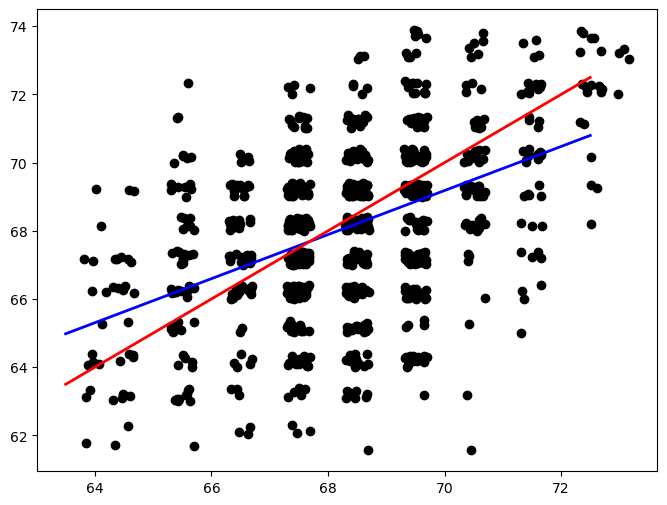

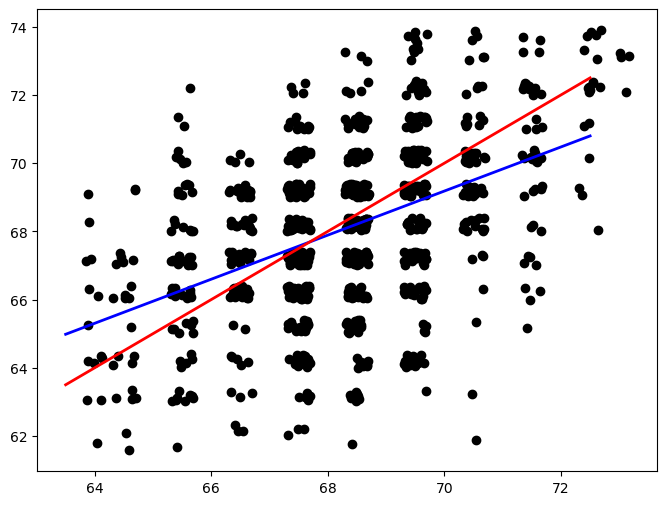

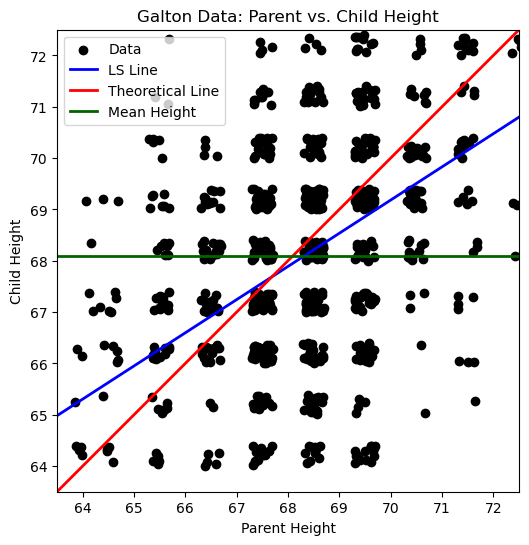

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
avg_height = galton["child"].mean()
# Define the x-range for our lines (set to match xlim in R)
x_range = np.array([63.5, 72.5])

# Create a new figure
plt.figure(figsize=(8, 6))

# (a) Plot the data as black dots. To mimic geom_jitter, you can add a small random noise.
jitter_strength = 0.2  # adjust as needed
plt.scatter(galton['parent'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(galton)),
            galton['child'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(galton)),
            color='black', label='Data')

# (b) Plot the least squares line (blue) using your computed b_0 and b_1.
y_ls = b_0 + b_1 * x_range
plt.plot(x_range, y_ls, color='blue', linewidth=2, label='LS Line')

# (c) Plot the theoretical line: child = parent (red).
plt.plot(x_range, x_range, color='red', linewidth=2, label='Theoretical Line')

# (d) Plot the horizontal line at the average height (green).
plt.axhline(y=avg_height, color='darkgreen', linewidth=2, label='Mean Height')

# Set the x and y limits
plt.xlim(63.5, 72.5)
plt.ylim(63.5, 72.5)

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt.title('Galton Data: Parent vs. Child Height')
plt.legend()
plt.show()

1) Fill in the following sentence:  Children of short parents became ... on average and children of tall parents became ... on average.

Children of short parents became taller on average and children of tall parents became shorter on average.

Why did Galton call it "Regression towards mediocrity in hereditary stature" which was later shortened to "regression to the mean"?

because the heights with the extremely short and tall parents are close to the average height which mean tall parents tended to have somewhat shorter children and short parents tended to have somewhat taller children. Children's heights were not as extreme as their parents' heights.

Why should this effect be real?

this effect should be real because the height is not always one to one ratio. Even the parents have extreme tall or short, the average of the children is not extreme. In term of genetics, the height of the parent and the children will not always be mirror.

You now have unlocked the mystery. Why is it that when modeling with y continuous, everyone calls it "regression"? Write a better, more descriptive and appropriate name for building predictive models with y continuous.

It calls regression because it regresses toward to average when it becomes extreme values. I would say Continuity Model.

You can now clear the workspace by restarting the kernel

Create a dataset D which we call `Xy` such that the linear model has R^2 about 50\% and RMSE approximately 1.

R-squared: 0.50
RMSE: 0.91


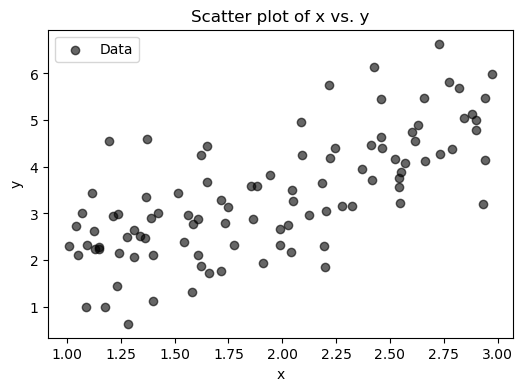

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


np.random.seed(42)

# Generate data
n = 100
x = np.random.uniform(1, 3, n) 
y = np.random.normal(1.75 * x, 1, n)  


Xy = pd.DataFrame({"x": x, "y": y})

# Fit linear model
X_const = sm.add_constant(x)  
model = sm.OLS(y, X_const).fit()


r_squared = model.rsquared
RMSE = np.sqrt(model.mse_resid)  

# Print results
print(f"R-squared: {r_squared:.2f}")
print(f"RMSE: {RMSE:.2f}")

# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(Xy["x"], Xy["y"], color='black', alpha=0.6, label="Data")  # Equivalent to geom_point()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x vs. y")
plt.legend()
plt.show()


Extra credit (+5): Create a dataset D and a model that can give you R^2 arbitrarily close to 1 i.e. approximately 1 - epsilon but RMSE arbitrarily high i.e. approximately M.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
